# Part I: Data Preparation

## Read data from csv

In [1]:
import pandas as pd

DATA_DIR = 'data'
CSV_FILE = DATA_DIR + '/KaggleV2-May-2016.csv'
#CSV_FILE = DATA_DIR + '/KaggleV2-May-2016-small.csv'

appt_df = pd.read_csv(CSV_FILE)

#appt_df.head()

## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle
- Transform categorical variables into numeric variable

In [2]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df

In [3]:
clean_appt_df = appt_df.copy()

#remove invalid data
invalid_age_df = clean_appt_df.loc[clean_appt_df['Age'] < 0]
clean_appt_df = clean_appt_df[~clean_appt_df.isin(invalid_age_df)].dropna()

#reformat date time data
clean_appt_df['ScheduledDay'] = pd.to_datetime( clean_appt_df['ScheduledDay'].str.replace('T', ' ').str.replace('Z', ''))
clean_appt_df['AppointmentDay'] = pd.to_datetime( clean_appt_df['AppointmentDay'].str.replace('T', ' ').str.replace('Z', ''))

#rename column name 
clean_appt_df.rename(columns = {'No-show':'NoShow'}, inplace = True)
clean_appt_df['Medium_Age'] = clean_appt_df['Age'].mean()

#Transform categorical variables into numeric variable
clean_appt_df['NoShowTrans'] = clean_appt_df['NoShow'].map({'Yes': 1, 'No': 0})
clean_appt_df['GenderTrans'] = clean_appt_df['Gender'].map({'M': 1, 'F': 0})

#clean_appt_df.head()
clean_appt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null float64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null float64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null float64
Hipertension      110526 non-null float64
Diabetes          110526 non-null float64
Alcoholism        110526 non-null float64
Handcap           110526 non-null float64
SMS_received      110526 non-null float64
NoShow            110526 non-null object
Medium_Age        110526 non-null float64
NoShowTrans       110526 non-null int64
GenderTrans       110526 non-null int64
dtypes: datetime64[ns](2), float64(10), int64(2), object(3)
memory usage: 15.2+ MB


In [4]:
clean_appt_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Medium_Age,NoShowTrans,GenderTrans
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,1.105260e+05,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,3.708922e+01,0.201934,0.350026
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,6.394914e-11,0.401445,0.476980
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.708922e+01,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.708922e+01,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.708922e+01,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.708922e+01,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.708922e+01,1.000000,1.000000


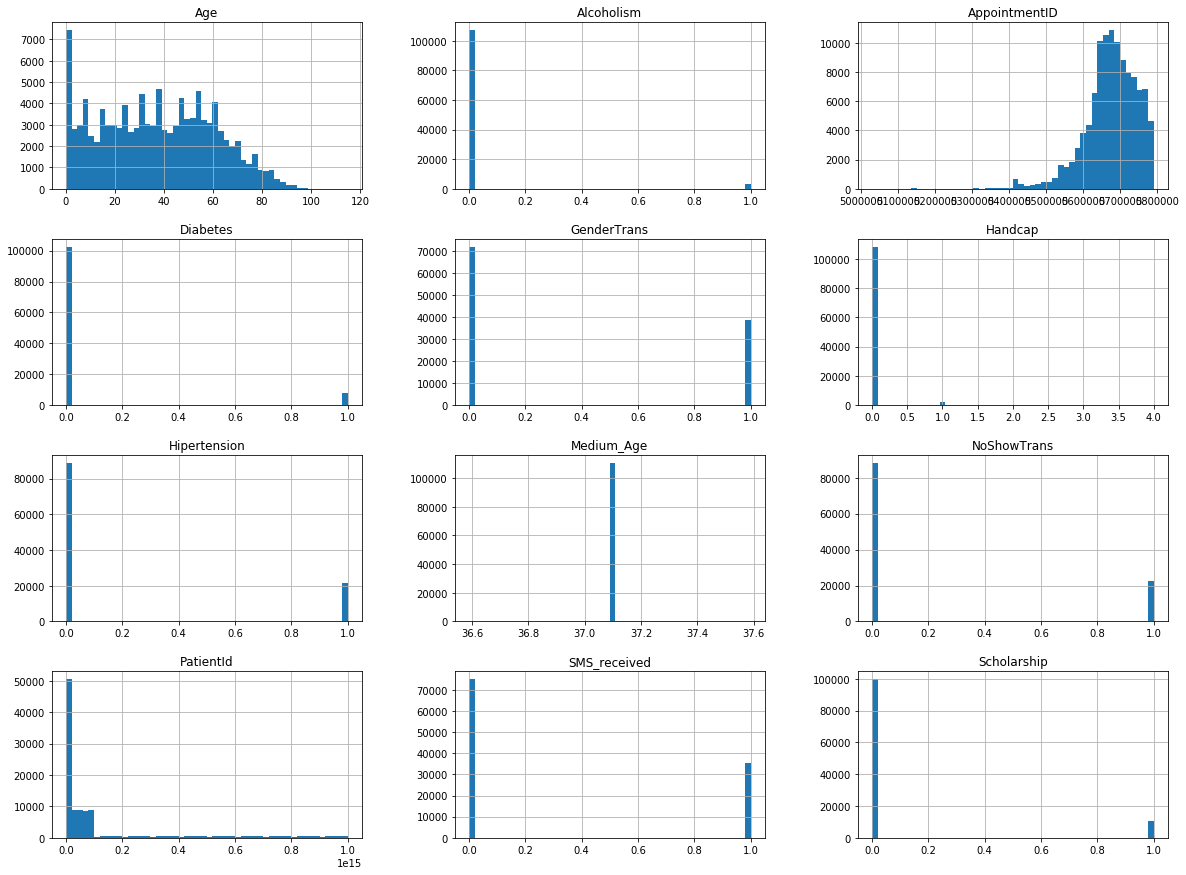

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
clean_appt_df.hist(bins=50, figsize=(20,15))
plt.show()

## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [6]:
import os

PROCESSED_DATA_DIR = 'processed_data'
if not os.path.isdir(PROCESSED_DATA_DIR):
    os.mkdir(PROCESSED_DATA_DIR)

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

In [7]:
import numpy as np

clean_appt_df["Age_cal"] = np.ceil(clean_appt_df["Age"]/clean_appt_df["Medium_Age"] / 0.5)
clean_appt_df["Age_cal"].where(clean_appt_df["Age_cal"] < 5, 5.0, inplace=True)

In [8]:
clean_appt_df["Age_cal"].value_counts() / len(clean_appt_df)

2.0    0.246548
3.0    0.243436
1.0    0.229150
4.0    0.195140
5.0    0.053707
0.0    0.032020
Name: Age_cal, dtype: float64

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

test_size = 1.0 * (20000 / len(clean_appt_df))

split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=1234)
for train_index, test_index in split.split(clean_appt_df, clean_appt_df["Age_cal"]):
    train_set = clean_appt_df.loc[train_index]
    test_set = clean_appt_df.loc[test_index]
    
train_set["Age_cal"].value_counts() / len(train_set)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


2.0    0.246426
3.0    0.243632
1.0    0.228984
4.0    0.195049
5.0    0.053797
0.0    0.032101
Name: Age_cal, dtype: float64

In [10]:
# Verify Test size
len(test_set)

20000

In [11]:
test_set["Age_cal"].value_counts() / len(test_set)

2.0    0.24710
3.0    0.24250
1.0    0.22990
4.0    0.19555
5.0    0.05330
0.0    0.03165
Name: Age_cal, dtype: float64

In [12]:
# remove classification related columns
for set in (train_set, test_set):
    set.drop(["Age_cal"], axis=1, inplace=True)
    set.drop(["Medium_Age"], axis=1, inplace=True)

In [13]:
train_set.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,NoShowTrans,GenderTrans
50444,6.672342e+14,5675635.0,M,2016-05-09 14:06:20,2016-05-09,10.0,FONTE GRANDE,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0
46311,8.829647e+10,5686590.0,F,2016-05-11 13:44:43,2016-05-16,32.0,SANTA LÚCIA,0.0,0.0,0.0,0.0,0.0,0.0,Yes,1.0,0.0
31859,9.337896e+14,5673318.0,F,2016-05-09 09:10:46,2016-05-11,31.0,RESISTÊNCIA,0.0,0.0,0.0,0.0,1.0,0.0,No,0.0,0.0
78890,4.567738e+13,5602483.0,F,2016-04-19 14:59:52,2016-05-19,32.0,JARDIM CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.0
66331,4.474378e+13,5743627.0,F,2016-05-30 09:12:17,2016-05-30,34.0,RESISTÊNCIA,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.0


In [14]:
#write results to files and load it to test 
# Switch True/False to run as needed
SAVE_DATA = True

train_set_csv_file = PROCESSED_DATA_DIR + '/train_set.csv'
test_set_csv_file = PROCESSED_DATA_DIR + '/test_set.csv'

if SAVE_DATA:
    train_set.to_csv(train_set_csv_file, index=False)    
    test_set.to_csv(test_set_csv_file, index=False)
    
    print('Data is saved')
else:     
    train_set = pd.read_csv(train_set_csv_file)    
    test_set =  pd.read_csv(test_set_csv_file)

    print('Data is loaded')

Data is saved


## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

1. Prepare Plot Data

In [77]:
import numpy as np

#Transform categorical variables into numeric variable
train_set['ApptYearMonthDay'] = train_set['AppointmentDay'].map(lambda x: 10000*x.year + 100*x.month + x.day)
train_set['ApptYearMonth'] = train_set['AppointmentDay'].map(lambda x: 100*x.year + x.month)
train_set['ApptMonth'] = train_set['AppointmentDay'].map(lambda x: x.month)
train_set['ApptDay'] = train_set['AppointmentDay'].map(lambda x: x.day)

train_set['SchedYearMonthDay'] = train_set['ScheduledDay'].map(lambda x: 10000*x.year + 100*x.month + x.day)
train_set['SchedYearMonth'] = train_set['ScheduledDay'].map(lambda x: 100*x.year + x.month)
train_set['SchedMonth'] = train_set['ScheduledDay'].map(lambda x: x.month)
train_set['SchedDay'] = train_set['ScheduledDay'].map(lambda x: x.day)

d = ["Morning", "Afternoon", "Evening", "Night"]
dnum = [1, 2, 3, 4]
periods = [0.0, 21600.0, 43200.0, 64800.0, 86400.0] 

train_set[['hour','minute','second']] = pd.to_timedelta(train_set['ScheduledDay']).dt.components.iloc[:, 1:4]
train_set["SchedSec"] = train_set['hour']*3600 + train_set['minute']*60 + train_set['second']
train_set["SchedPeriod"] = pd.cut(train_set["SchedSec"], periods, labels=d)
train_set["SchedPeriodTran"] = pd.cut(train_set["SchedSec"], periods, labels=dnum)

neighbourhoods = list(train_set['Neighbourhood'].unique())
area_num_labels = np.arange(1,len(neighbourhoods)+1,1)
area_dict = dict(zip(neighbourhoods, area_num_labels))
train_set["NeighbourhoodTran"] = train_set['Neighbourhood'].map(lambda x: area_dict.get(x,None))

In [102]:
#schedule day after appointment day
test_df = train_set.loc[train_set['ApptYearMonthDay'] == train_set['SchedYearMonthDay'] ]

df = test_df[['ScheduledDay','AppointmentDay','NoShow']]

#df

2. Plot the No-show variable against other variables

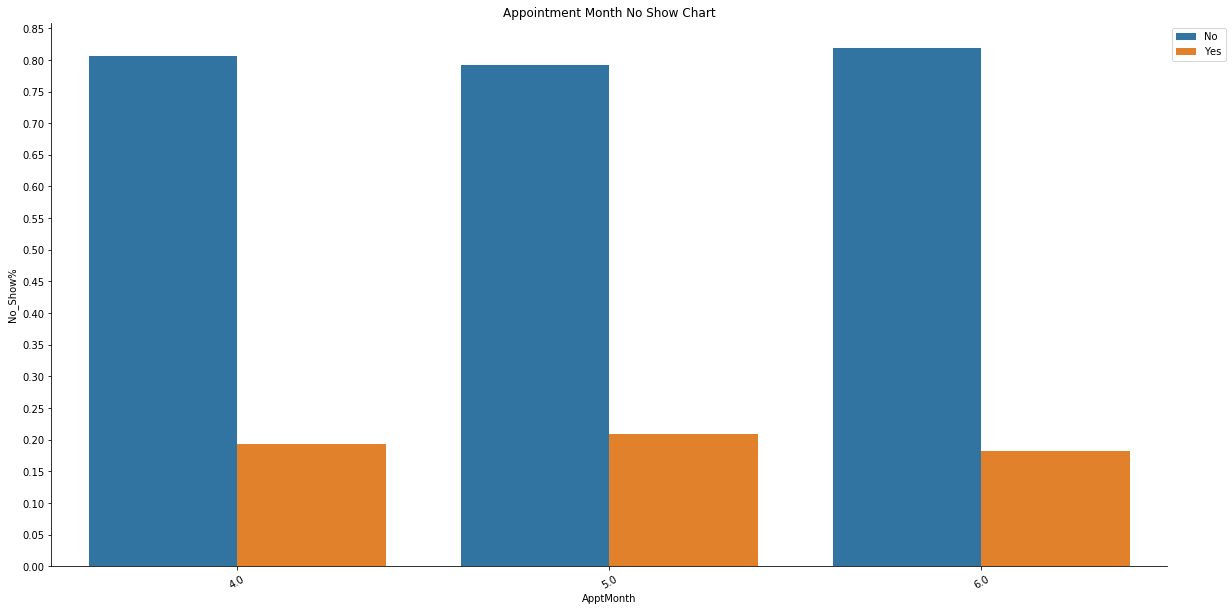

In [154]:
# Make plots here!
from noshow_lib.helpers import *

plot_df = train_set[['ApptMonth','NoShow']].groupby(['ApptMonth','NoShow']).size().reset_index(name='Counts')
plot_df['TotalAppointments'] = plot_df.groupby('ApptMonth')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='ApptMonth',y='No_Show%',hue='NoShow',bins=30, 
           title='Appointment Month No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

It looks like that people may miss appointment more in May of the year.

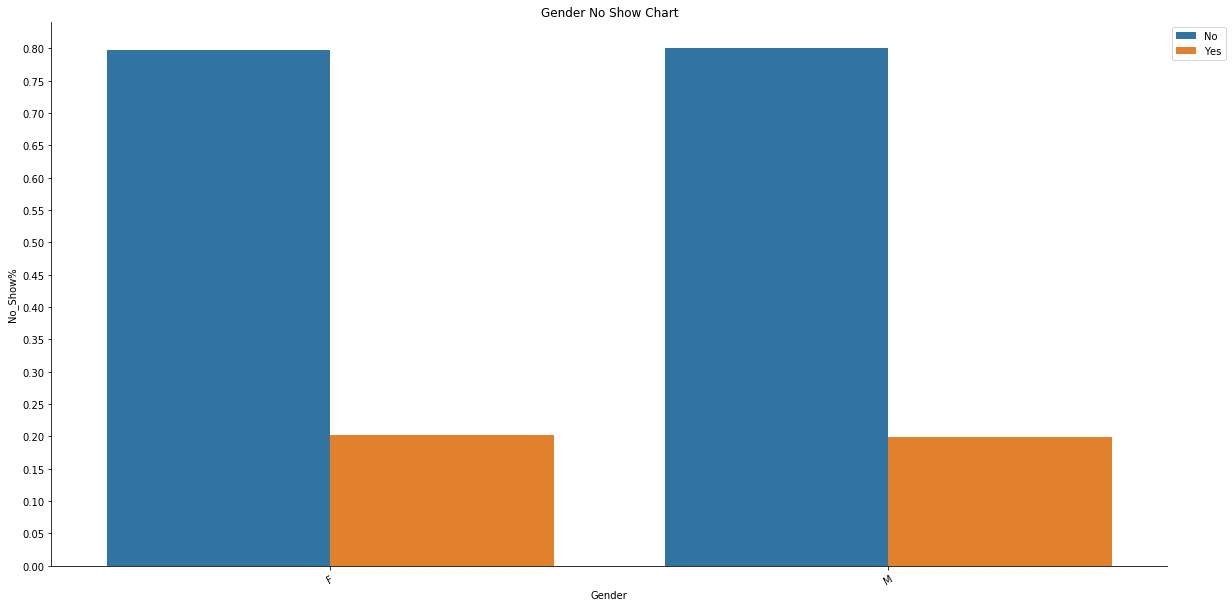

In [153]:
# Make plots here!
from noshow_lib.helpers import *

plot_df = train_set[['Gender','NoShow']].groupby(['Gender','NoShow']).size().reset_index(name='Counts')
plot_df['TotalAppointments'] = plot_df.groupby('Gender')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='Gender',y='No_Show%',hue='NoShow',bins=30, 
           title='Gender No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

Gender doesn't seems matter to determine whether miss appointment.

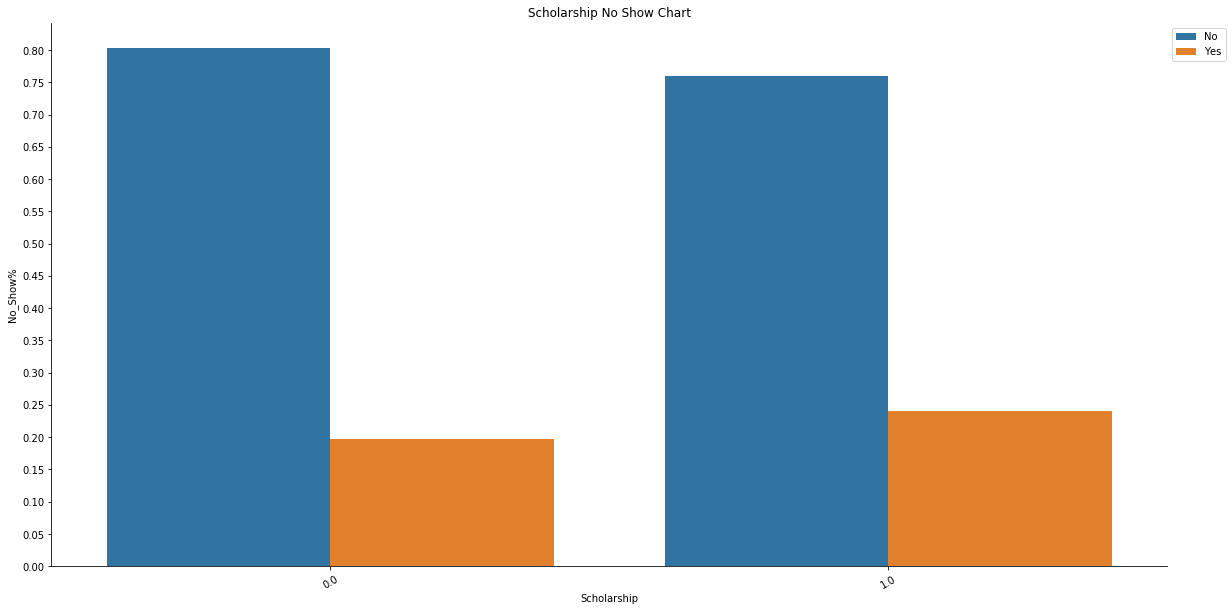

In [152]:
#Scholarship	Hipertension	Diabetes	Alcoholism	Handcap	SMS_received

plot_df = train_set[['Scholarship','NoShow']].groupby(['Scholarship','NoShow']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('Scholarship')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='Scholarship',y='No_Show%',hue='NoShow',bins=30, 
           title='Scholarship No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

People who have Scholarship are most like missing appointment.

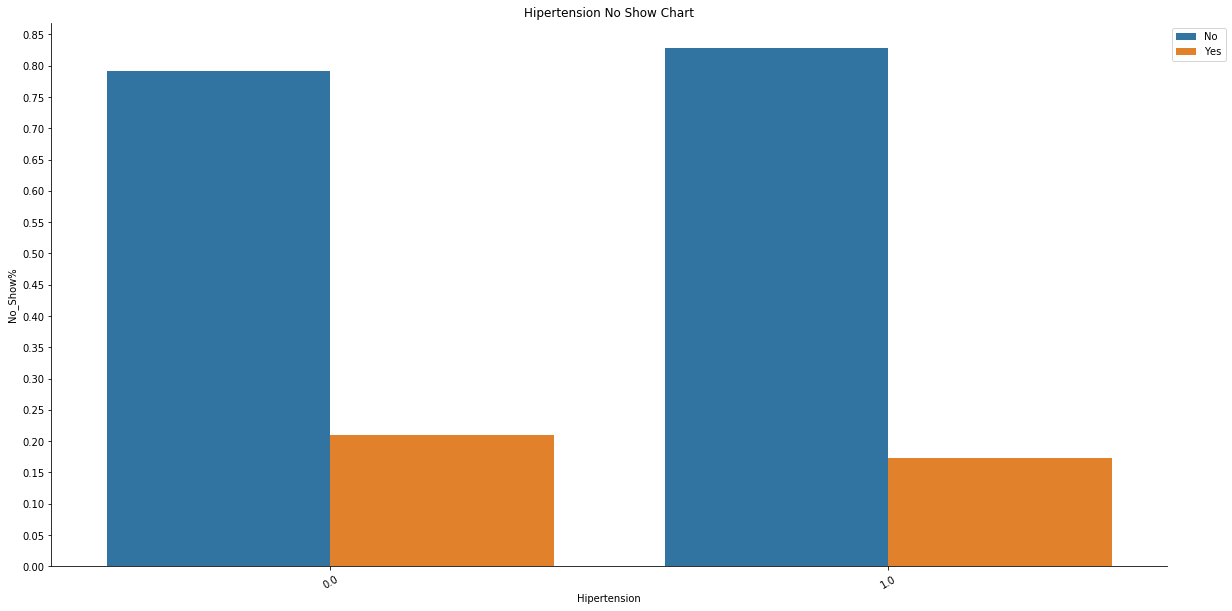

In [151]:
#Scholarship	Hipertension	Diabetes	Alcoholism	Handcap	SMS_received

plot_df = train_set[['Hipertension','NoShow']].groupby(['Hipertension','NoShow']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('Hipertension')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='Hipertension',y='No_Show%',hue='NoShow',bins=30, 
           title='Hipertension No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

People who is not Hipertension will have a little higher chance to miss appointment.

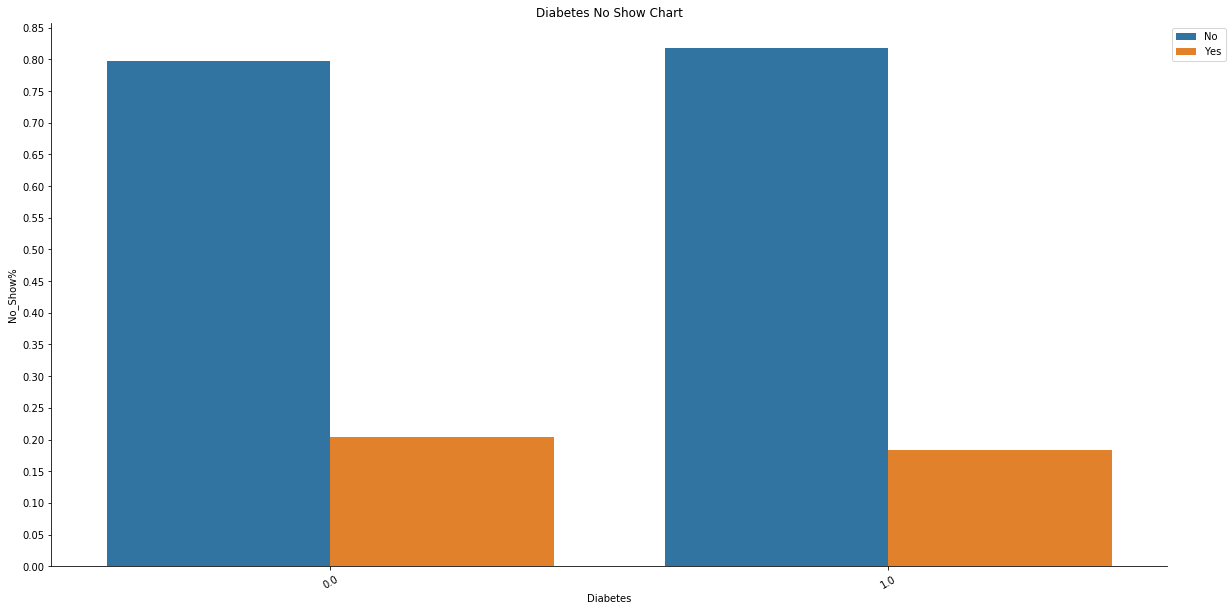

In [150]:
#Scholarship	Hipertension	Diabetes	Alcoholism	Handcap	SMS_received

plot_df = train_set[['Diabetes','NoShow']].groupby(['Diabetes','NoShow']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('Diabetes')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='Diabetes',y='No_Show%',hue='NoShow',bins=30, 
           title='Diabetes No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

People who doesn't have Diabetes will have a slightly highter chance of missing the appointment.

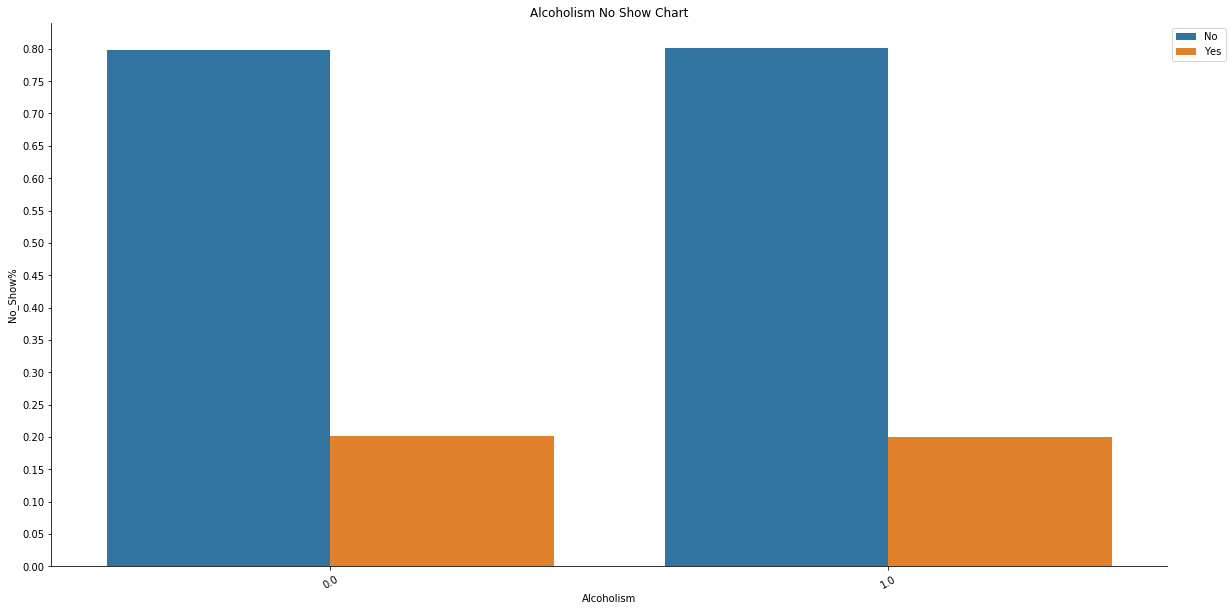

In [149]:
#Scholarship	Hipertension	Diabetes	Alcoholism	Handcap	SMS_received

plot_df = train_set[['Alcoholism','NoShow']].groupby(['Alcoholism','NoShow']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('Alcoholism')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='Alcoholism',y='No_Show%',hue='NoShow',bins=30, 
           title='Alcoholism No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

Alcoholism doesn't contribute to whether show or not show on appointment.

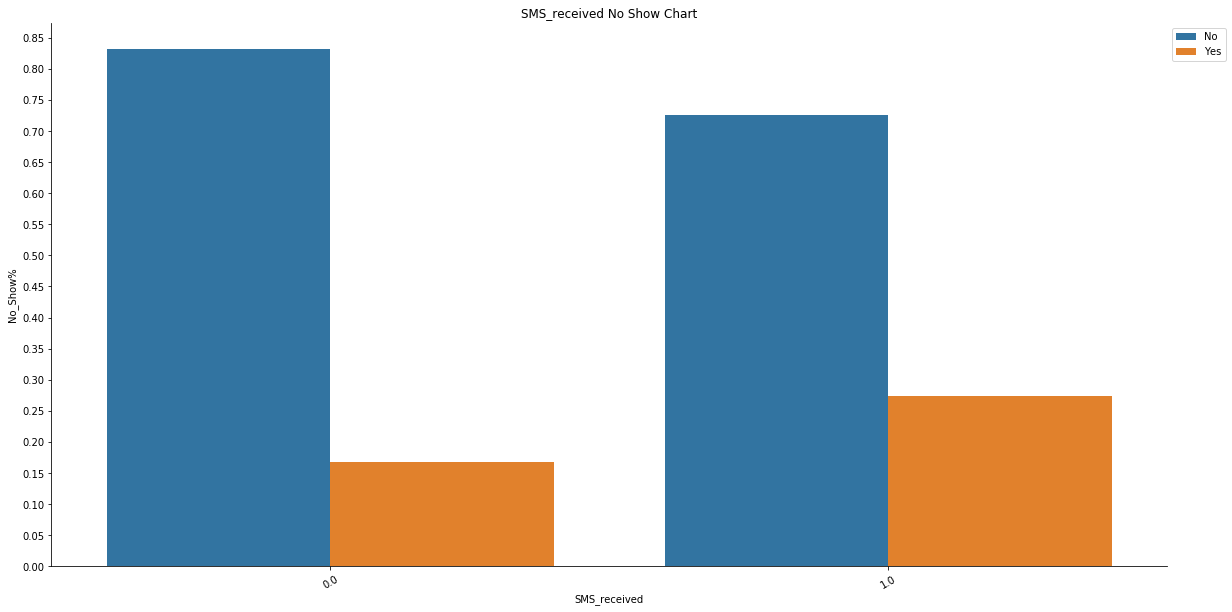

In [148]:
#Scholarship	Hipertension	Diabetes	Alcoholism	Handcap	SMS_received

plot_df = train_set[['SMS_received','NoShow']].groupby(['SMS_received','NoShow']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('SMS_received')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='SMS_received',y='No_Show%',hue='NoShow',bins=30, 
           title='SMS_received No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

People who is SMS_received most likely will miss appointment.

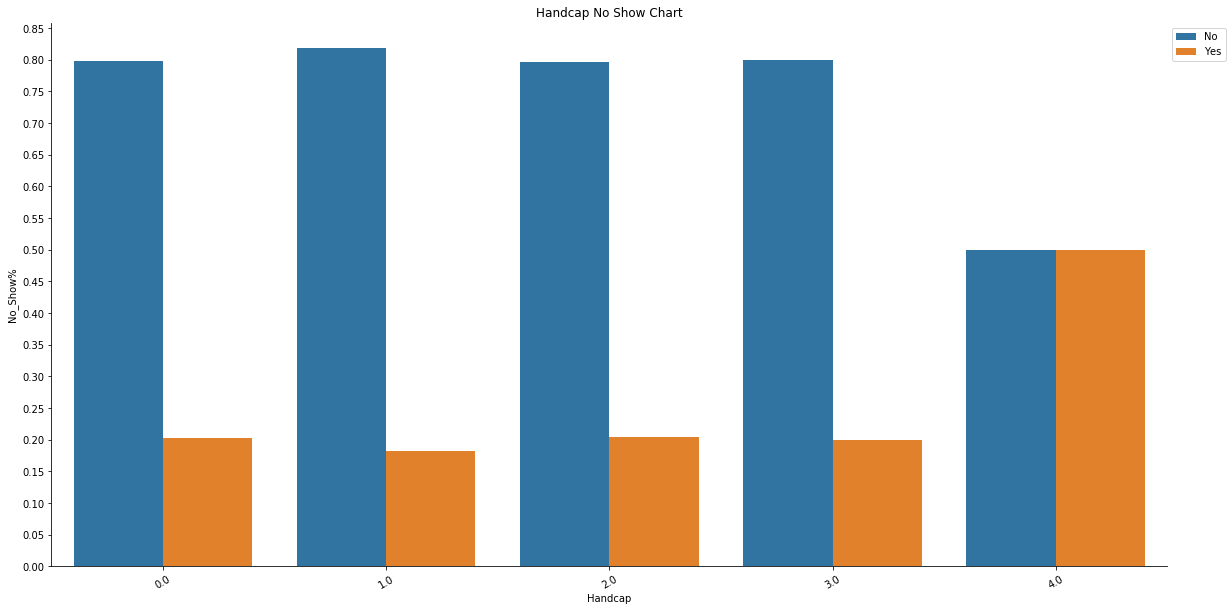

In [147]:
#Scholarship	Hipertension	Diabetes	Alcoholism	Handcap	SMS_received

plot_df = train_set[['Handcap','NoShow']].groupby(['Handcap','NoShow']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('Handcap')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='Handcap',y='No_Show%',hue='NoShow',bins=30, 
           title='Handcap No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

People most likely will miss appointment when they are handcap 4.

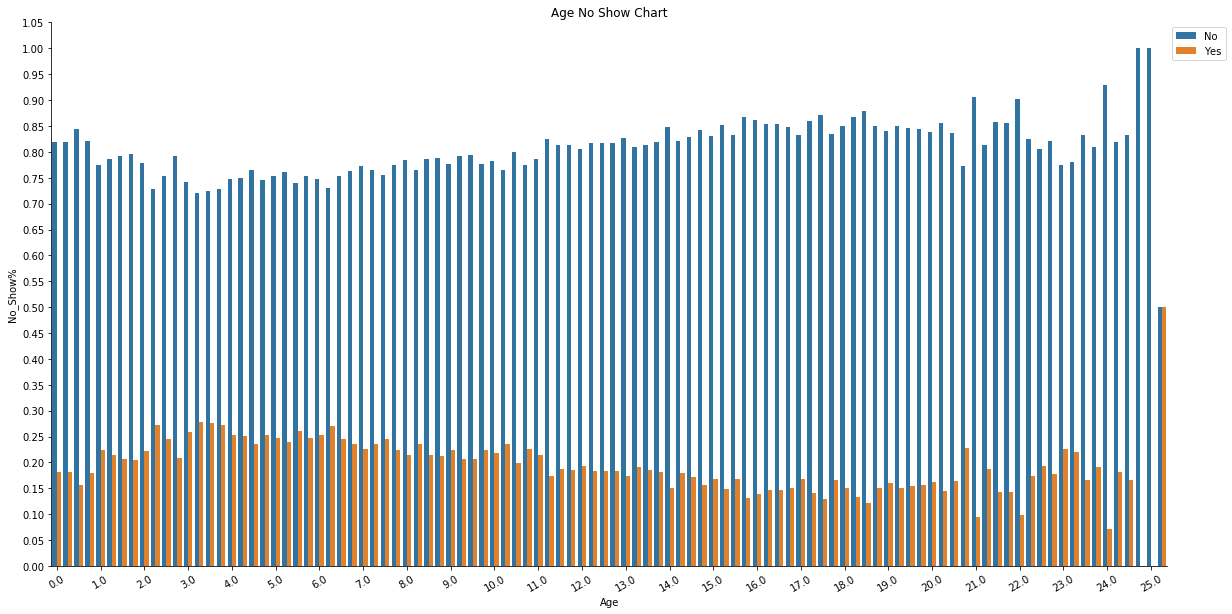

In [145]:
plot_df = train_set[['Age','NoShow']].groupby(['Age','NoShow']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('Age')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='Age',y='No_Show%',hue='NoShow',bins=30, 
           title='Age No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

People most likely will miss appointment around age 25.

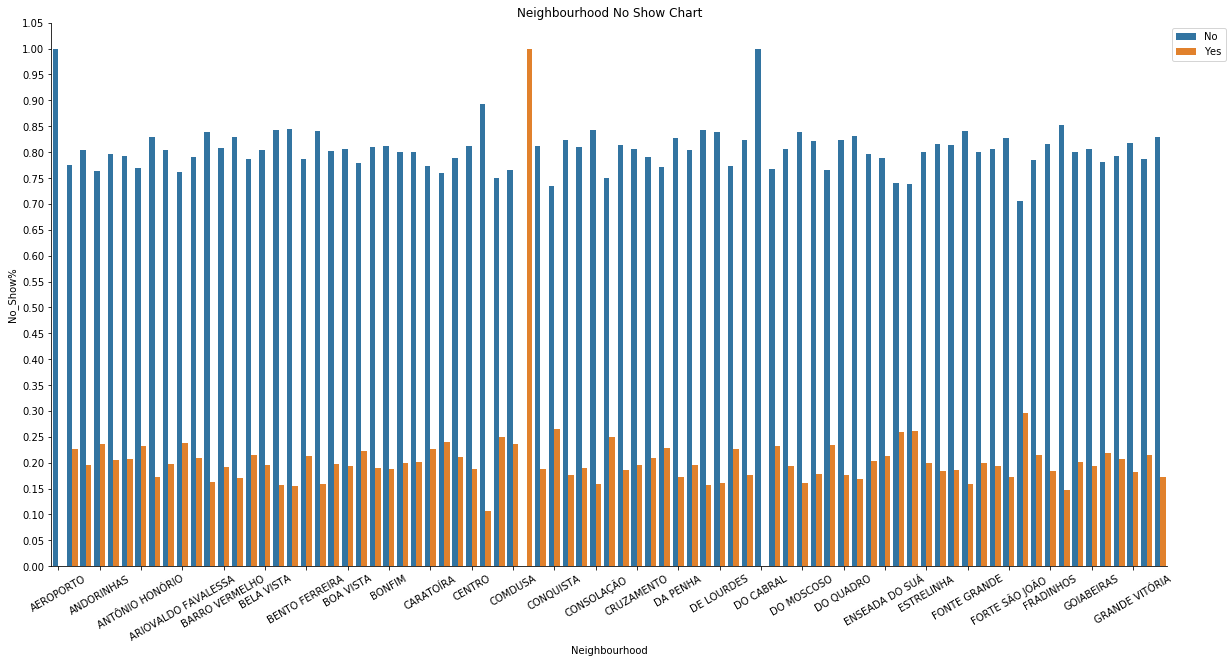

In [144]:
plot_df = train_set[['Neighbourhood','NoShow']].groupby(['Neighbourhood','NoShow']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('Neighbourhood')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='Neighbourhood',y='No_Show%',hue='NoShow',bins=30, 
           title='Neighbourhood No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

People are from the following nighbourhoods, most likely will miss the appointment:
- COMOUSA
- FONTE SAO JOAO

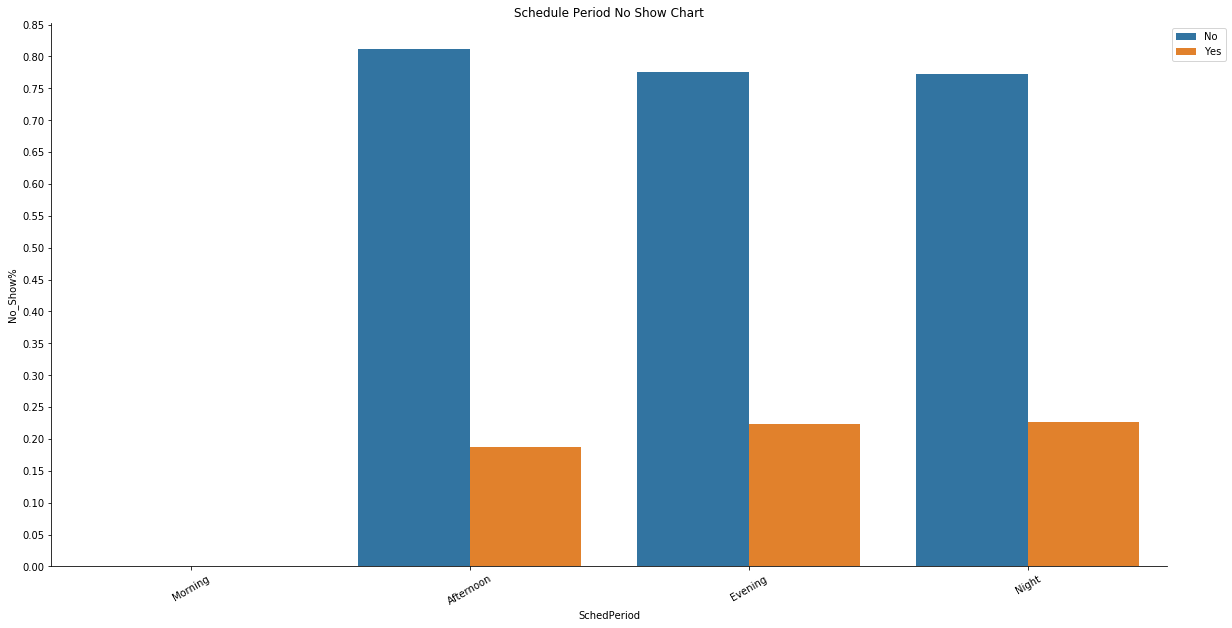

In [143]:
plot_df = train_set[['SchedPeriod','NoShow']].groupby(['SchedPeriod','NoShow']).size().reset_index(name='Counts')

plot_df['TotalAppointments'] = plot_df.groupby('SchedPeriod')['Counts'].transform('sum')
plot_df['No_Show%'] = 1.0* plot_df['Counts']/ plot_df['TotalAppointments'] 

ShowBarPlot(data=plot_df, x='SchedPeriod',y='No_Show%',hue='NoShow',bins=30, 
           title='Schedule Period No Show Chart',
           rotation=30,figsize_x=20, figsize_y=10)

When schedule was made in evening and at night Period, most likely people won not show up for appointment

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import numpy as np

# create pipeline here!
#Transform categorical variables into numeric variable
train_set['ApptYearMonthDay'] = train_set['AppointmentDay'].map(lambda x: 10000*x.year + 100*x.month + x.day)
train_set['ApptYearMonth'] = train_set['AppointmentDay'].map(lambda x: 100*x.year + x.month)
train_set['ApptMonth'] = train_set['AppointmentDay'].map(lambda x: x.month)
train_set['ApptDay'] = train_set['AppointmentDay'].map(lambda x: x.day)

train_set['SchedYearMonthDay'] = train_set['ScheduledDay'].map(lambda x: 10000*x.year + 100*x.month + x.day)
train_set['SchedYearMonth'] = train_set['ScheduledDay'].map(lambda x: 100*x.year + x.month)
train_set['SchedMonth'] = train_set['ScheduledDay'].map(lambda x: x.month)
train_set['SchedDay'] = train_set['ScheduledDay'].map(lambda x: x.day)

d = ["Morning", "Afternoon", "Evening", "Night"]
dnum = [1, 2, 3, 4]
periods = [0.0, 21600.0, 43200.0, 64800.0, 86400.0] 

train_set[['hour','minute','second']] = pd.to_timedelta(train_set['ScheduledDay']).dt.components.iloc[:, 1:4]
train_set["SchedSec"] = train_set['hour']*3600 + train_set['minute']*60 + train_set['second']
train_set["SchedPeriod"] = pd.cut(train_set["SchedSec"], periods, labels=d)
train_set["SchedPeriodTran"] = pd.cut(train_set["SchedSec"], periods, labels=dnum)

neighbourhoods = list(train_set['Neighbourhood'].unique())
area_num_labels = np.arange(1,len(neighbourhoods)+1,1)
area_dict = dict(zip(neighbourhoods, area_num_labels))
train_set["NeighbourhoodTran"] = train_set['Neighbourhood'].map(lambda x: area_dict.get(x,None))

# show the first 5 rows of the transformed training set
train_set.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,SchedYearMonth,SchedMonth,SchedDay,SchedSec,hour,minute,second,SchedPeriod,SchedPeriodTran,NeighbourhoodTran
50444,6.672342e+14,5675635.0,M,2016-05-09 14:06:20,2016-05-09,10.0,FONTE GRANDE,0.0,0.0,0.0,...,201605.0,5.0,9.0,50780.0,14.0,6.0,20.0,Evening,3,1
46311,8.829647e+10,5686590.0,F,2016-05-11 13:44:43,2016-05-16,32.0,SANTA LÚCIA,0.0,0.0,0.0,...,201605.0,5.0,11.0,49483.0,13.0,44.0,43.0,Evening,3,2
31859,9.337896e+14,5673318.0,F,2016-05-09 09:10:46,2016-05-11,31.0,RESISTÊNCIA,0.0,0.0,0.0,...,201605.0,5.0,9.0,33046.0,9.0,10.0,46.0,Afternoon,2,3
78890,4.567738e+13,5602483.0,F,2016-04-19 14:59:52,2016-05-19,32.0,JARDIM CAMBURI,0.0,0.0,0.0,...,201604.0,4.0,19.0,53992.0,14.0,59.0,52.0,Evening,3,4
66331,4.474378e+13,5743627.0,F,2016-05-30 09:12:17,2016-05-30,34.0,RESISTÊNCIA,0.0,0.0,0.0,...,201605.0,5.0,30.0,33137.0,9.0,12.0,17.0,Afternoon,2,3
